In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [19]:
# Series - One-dimensional ndarray with axis labels (including time series)
obj = pd.Series([4, 7, -5, 3])
print("idx  data")
print(obj, '\n')
print("values = ", obj.values)
print("index = ", obj.index, '\n')

obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c']) # define labels
print("idx  data")
print(obj2, '\n')
print("values = ", obj2.values)
print("index = ", obj2.index)

idx  data
0    4
1    7
2   -5
3    3
dtype: int64 

values =  [ 4  7 -5  3]
index =  RangeIndex(start=0, stop=4, step=1) 

idx  data
d    4
b    7
a   -5
c    3
dtype: int64 

values =  [ 4  7 -5  3]
index =  Index(['d', 'b', 'a', 'c'], dtype='object')


In [27]:
# indexing using labels
print(r"Object at label 'a': ", obj2['a']) # use label to index data
obj2['d'] = 6                              # use label to set a data value
print(r"Object at label 'd': ", obj2['d']) 
print("\nObjects at labels:")
print(obj2[['c', 'a', 'd']], '\n') # ['c', 'a', 'd'] is a list of indicies

# math or numpy functions preserve index-value structure
print(obj2[obj2 > 0], '\n')
print(obj2 * 2, '\n')
print(np.exp(obj2), '\n')

Object at label 'a':  -5
Object at label 'd':  6

Objects at labels:
c    3
a   -5
d    6
dtype: int64 

d    6
b    7
c    3
dtype: int64 

d    12
b    14
a   -10
c     6
dtype: int64 

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64 



In [43]:
# A Series is similar to a fixed length ordered dict
print('b' in obj2)  # perform test for inclusion as you would a dict
print('e' in obj2, '\n')

sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)  # convert dict to a Series
print(obj3, '\n')

# Overide index sorting
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states)
print(obj4, '\n') # Note: 'NaN' is used to indicate 'missing' or 'NA' data

# sidebar - .isnull() and aligning data: both covered later
print(obj4.isnull(), '\n') # isnull() to checkfor 'missing' data

print(obj3, '\n')
print(obj4, '\n')
print(obj3 + obj4, '\n') # automatic alignment by index label

# .name attribute
obj4.name = 'population'
obj4.index.name = 'state'
print(obj4, '\n')

# .index attribute to change a Series's index by assignment
print(obj, '\n')
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print(obj, '\n')
print(frame2.columns, '\n')

True
False 

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool 

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64 

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64 

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64 

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64 

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64 

Index(['year', 'state', 'pop', 'debt'], dtype='object') 



In [15]:
# DataFrame: a two-dimensional dict-like container for Series objects.
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
print(data, '\n')

frame = pd.DataFrame(data) # convert data from dict to dataframe
print(frame, '\n')
print(frame.head(), '\n') # use '.head()' to display first 5 rows

# Arrange data in oder specified by using 'columns' argument
print(pd.DataFrame(data, columns=['year', 'state', 'pop']), '\n')

# Creating a new column, without values, initializes with 'NaN'
# statement also changes name of the indicies
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
print(frame2, '\n')

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002, 2003], 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]} 

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2 

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9 

   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
5  2003  Nevada  3.2 

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN 



In [16]:
# DataFrame indexing

# A DataFrame column can be retrieved by use of 
print(frame2['state'], '\n') # its index name or
print(frame2.state, '\n') # attribute(must be a valid Python variable name)

# A DataFrame row can be retrievedby position or name with .loc attribute
print(frame2.loc['three'], '\n')

# Columns are modified by assignment
frame2['debt'] = 16.5  # initialize 'debt' column to '16.5'
print(frame2, '\n')
frame2['debt'] = np.arange(6.) # use an array to set individual values
print(frame2, '\n')

val = pd.Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])
frame2['debt'] = val
# if array is not same length as DataFrame, missing values are set to 'NaN'
print(frame2, '\n')

# A new column is created on an assignment that doesn't exist
# Initalize new boolean column if 'state' = 'Ohio'
# Note: Cannot use 'frame2.eastern' attribute to create new columns
frame2['eastern'] = frame2.state == 'Ohio'  
print(frame2, '\n')

# delete columns using 'del'
del frame2['eastern']
print(frame2.columns)

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object 

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object 

       year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5 

       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0 

       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7
six    2003  Nevada  3.2   NaN 

       y

In [17]:
# Nested dicts: (Outer dict keys = columns, inner dict keys = rows)
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
print(frame3, '\n')
print(frame3.T, '\n') # Transpose DataFrame as you would a NumPy array

# Avoid automatic sorting by providing 'index' with an explicit array
print(pd.DataFrame(pop, index = [2001, 2002, 2003]), '\n')

# Dicts of Series follow the same rules
pdata = {'Ohio': frame3['Ohio'][:-1], 
         'Nevada': frame3['Nevada'][:2]}
print(pd.DataFrame(pdata), '\n')

# A DataFrame's index and column are display if these attributs are set
frame3.index.name = 'year'; frame3.columns.name = 'state'
print(frame3, '\n')

print(frame3.values, '\n') # 'values' attribute returns the data
# if columns are different dtypes, than a common dtype is chosen
frame2.values # 'dtype' = 'object'


      Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6 

        2000  2001  2002
Nevada   NaN   2.4   2.9
Ohio     1.5   1.7   3.6 

      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN 

      Ohio  Nevada
2000   1.5     NaN
2001   1.7     2.4 

state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6 

[[nan 1.5]
 [2.4 1.7]
 [2.9 3.6]] 



array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

DataFrame constructor inputs
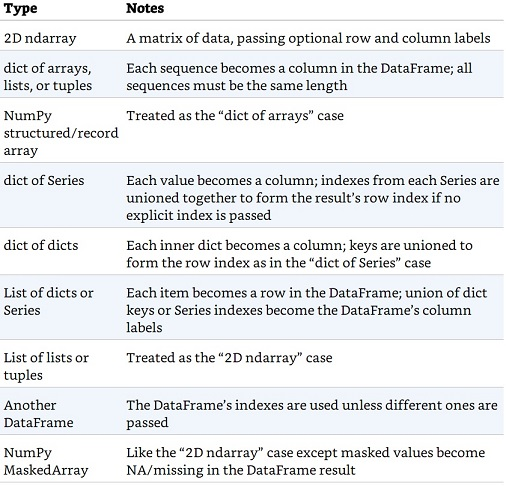

In [22]:
# Index Objects
obj = pd.Series(range(3), index = ['a', 'b', 'c'])
index = obj.index # automatically converted to an index
print(index)
print(index[1:], '\n')

try:
    index[1] = 'd'  # cannot assign new values to index objects
except TypeError:
    print("Index objects are immutable", '\n')
    
labels = pd.Index(np.arange(3))
print(labels)

obj2 = pd.Series([1.5, -2.5, 0], index = labels)
print(obj2, '\n')
print(obj2.index is labels)

# Indexs can behave like a fixed-size set
print(frame3, '\n')
print(frame3.columns)
print('Ohio' in frame3.columns)
print(2003 in frame3.index, '\n')

# However an Index can contain duplicate labels
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
print(dup_labels) 
# Note: selecting a duped label will choose all label occurances

Index(['a', 'b', 'c'], dtype='object')
Index(['b', 'c'], dtype='object') 

Index objects are immutable 

Int64Index([0, 1, 2], dtype='int64')
0    1.5
1   -2.5
2    0.0
dtype: float64 

True
state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6 

Index(['Nevada', 'Ohio'], dtype='object', name='state')
True
False 

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')


Common Index methods and properties
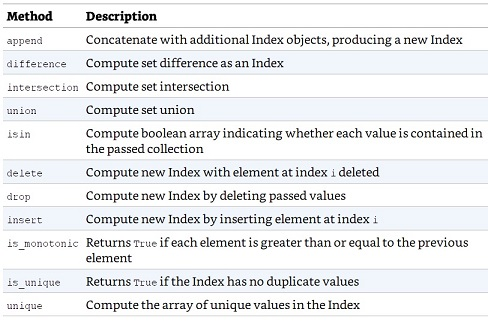